# Data Preprocessing

#### Importing Libraries

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Loading Dataset

In [14]:
augmented_data = pd.read_csv('Augmented_Data.csv')

#### Preparing features and target

In [15]:
X = augmented_data.drop(columns=['prognosis'])
y = augmented_data['prognosis']

#### Spliting into training and testing sets (80% train, 20% test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

#### Using MLPClassifier Model

In [17]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

#### Making Prediction on the test data

In [18]:
y_pred = model.predict(X_test)

#### Evaluating the model

In [19]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#### Printing the evaluation results

In [20]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9995121951219512

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       213
                                   AIDS       1.00      1.00      1.00       220
                                   Acne       0.99      1.00      1.00       193
                    Alcoholic hepatitis       1.00      1.00      1.00       212
                                Allergy       1.00      1.00      1.00       221
                              Arthritis       1.00      1.00      1.00       197
                       Bronchial Asthma       1.00      1.00      1.00       189
                   Cervical spondylosis       1.00      1.00      1.00       211
                            Chicken pox       1.00      1.00      1.00       186
                    Chronic cholestasis       1.00      1.00      1.00       211
                            Common Cold       1.00    

# Visualizing the Model

#### Importing Libraries

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Symptom Frequency Plot

C:\Users\daans\AppData\Local\Temp\ipykernel_21228\2994103934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")


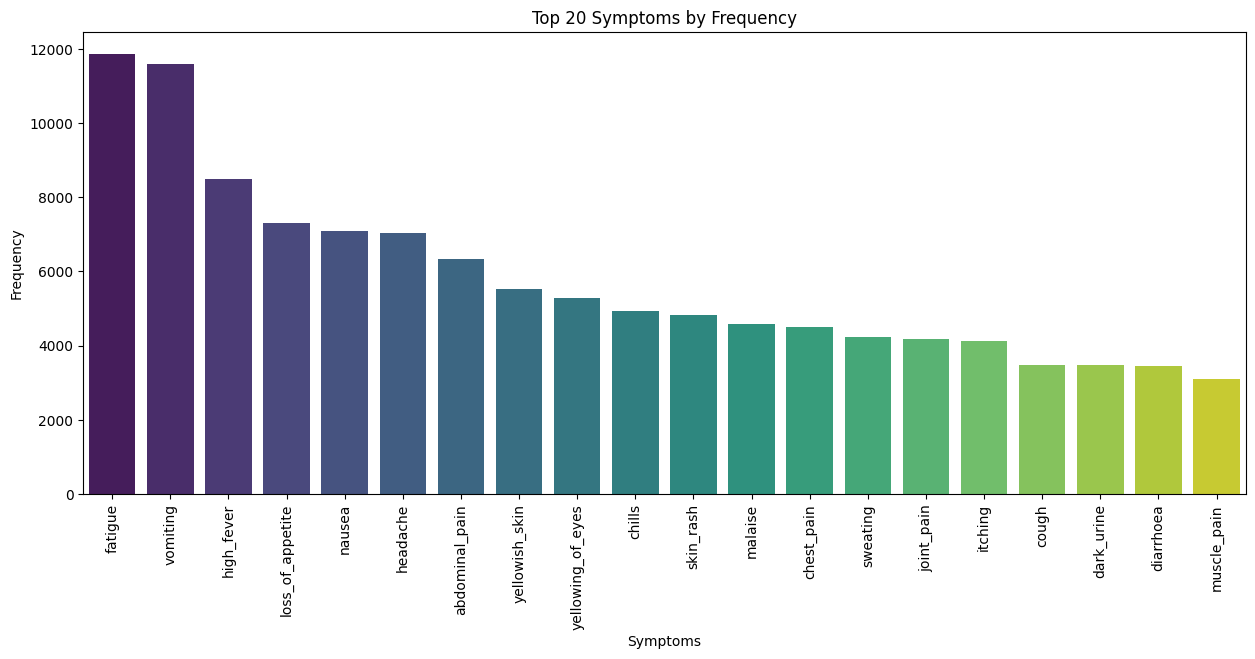

In [22]:
plt.figure(figsize=(15, 6))
symptom_counts = X_train.sum().sort_values(ascending=False).head(20)  # Top 20 symptoms by frequency
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 20 Symptoms by Frequency")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.show()

#### Confusion Matrix

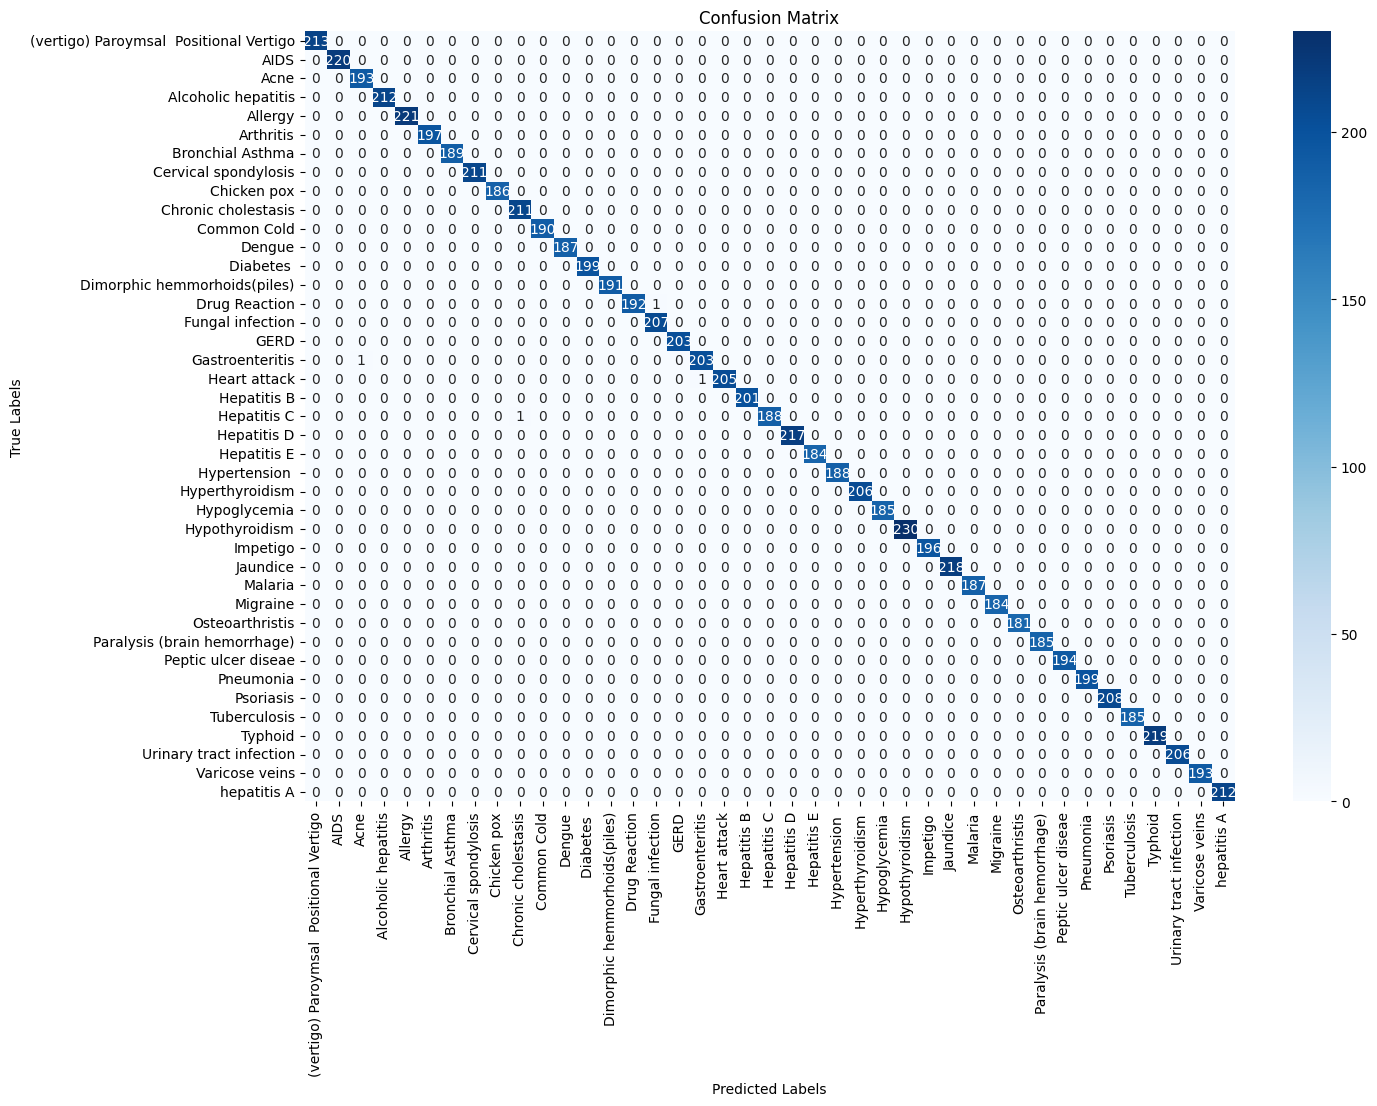

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Saving Model

In [24]:
import joblib
joblib.dump(model, 'final_model5.joblib')


['final_model5.joblib']